# Splines and GAMs

More flexible than polynomials for fitting non-linear functions

In [1]:
require(ISLR)
attach(Wage)
require(splines)


Loading required package: ISLR

Loading required package: splines



In [2]:
# bs function generates the basis
fit <- lm(wage ~ bs(age, knots = c(25, 40, 60)), data = Wage)
summary(fit)



Call:
lm(formula = wage ~ bs(age, knots = c(25, 40, 60)), data = Wage)

Residuals:
    Min      1Q  Median      3Q     Max 
-98.832 -24.537  -5.049  15.209 203.207 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       60.494      9.460   6.394 1.86e-10 ***
bs(age, knots = c(25, 40, 60))1    3.980     12.538   0.317 0.750899    
bs(age, knots = c(25, 40, 60))2   44.631      9.626   4.636 3.70e-06 ***
bs(age, knots = c(25, 40, 60))3   62.839     10.755   5.843 5.69e-09 ***
bs(age, knots = c(25, 40, 60))4   55.991     10.706   5.230 1.81e-07 ***
bs(age, knots = c(25, 40, 60))5   50.688     14.402   3.520 0.000439 ***
bs(age, knots = c(25, 40, 60))6   16.606     19.126   0.868 0.385338    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 39.92 on 2993 degrees of freedom
Multiple R-squared:  0.08642,	Adjusted R-squared:  0.08459 
F-statistic: 47.19 on 6 and 2993 DF,  p-value: < 

Warning message in smooth.spline(age, wage, cv = TRUE):
"cross-validation with non-unique 'x' values seems doubtful"


Call:
smooth.spline(x = age, y = wage, cv = TRUE)

Smoothing Parameter  spar= 0.6988943  lambda= 0.02792303 (12 iterations)
Equivalent Degrees of Freedom (Df): 6.794596
Penalized Criterion (RSS): 75215.9
PRESS(l.o.o. CV): 1593.383

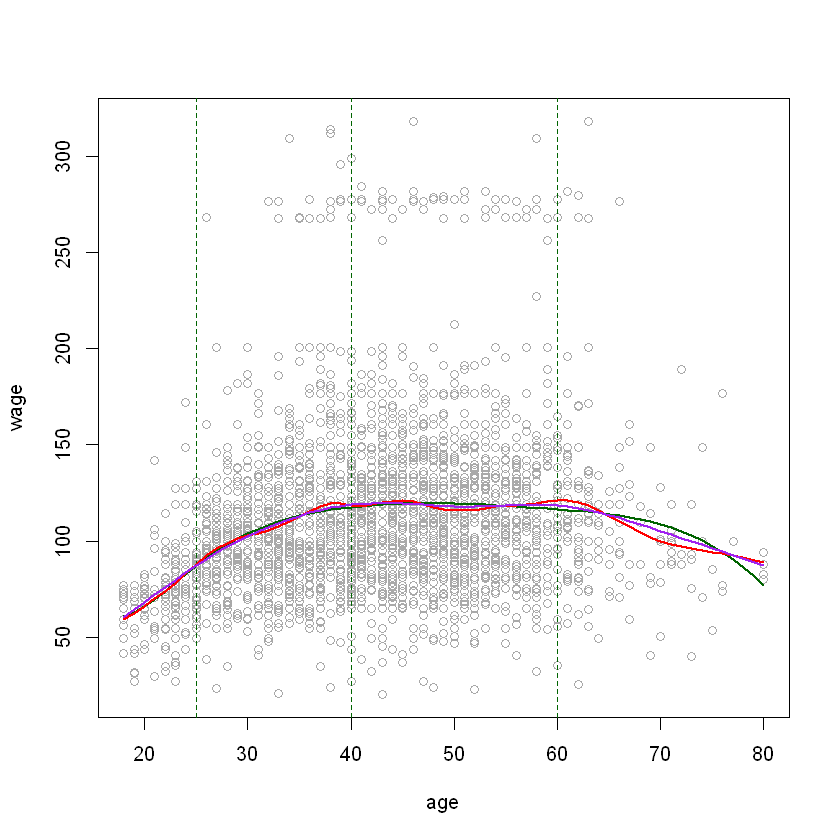

In [3]:
plot(age, wage, col = "darkgrey")

# Here we will explore cubic splines
agelims <- range(age)
age.grid <- seq(from = agelims[1], to = agelims[2])
lines(age.grid, predict(fit, list(age = age.grid)), col = "darkgreen", lwd = 2)
abline(v = c(25, 40, 60), lty = 2, col = "darkgreen")

# The smoothing spline does not require knot selection, but it does have a
# smoothing parameter, which can conveniently be specified via the effective
# degrees of freedom df.
fit.ss <- smooth.spline(age, wage, df = 16)
lines(fit.ss, col = "red", lwd = 2)

# Or we can use Leave One Out Cross-Validation (LOO) to select the smoothing
# parameter for us automatically
fit.loo <- smooth.spline(age, wage, cv = TRUE)
# Warning is fine for our purposes.
lines(fit.loo, col = "purple", lwd = 2)
# The one that the smoothing spline produced had a less
# effective degrees of freedom, it says 6.79. The effective
# degrees of freedom don't have to be an integer.
# It's a heuristic for how rough the function is.
fit.loo


In [6]:
fit <- lm(wage ~ bs(age, knots = c(25, 40, 60)), data = Wage)
summary(fit)


Call:
lm(formula = wage ~ bs(age, knots = c(25, 40, 60)), data = Wage)

Residuals:
    Min      1Q  Median      3Q     Max 
-98.832 -24.537  -5.049  15.209 203.207 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       60.494      9.460   6.394 1.86e-10 ***
bs(age, knots = c(25, 40, 60))1    3.980     12.538   0.317 0.750899    
bs(age, knots = c(25, 40, 60))2   44.631      9.626   4.636 3.70e-06 ***
bs(age, knots = c(25, 40, 60))3   62.839     10.755   5.843 5.69e-09 ***
bs(age, knots = c(25, 40, 60))4   55.991     10.706   5.230 1.81e-07 ***
bs(age, knots = c(25, 40, 60))5   50.688     14.402   3.520 0.000439 ***
bs(age, knots = c(25, 40, 60))6   16.606     19.126   0.868 0.385338    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 39.92 on 2993 degrees of freedom
Multiple R-squared:  0.08642,	Adjusted R-squared:  0.08459 
F-statistic: 47.19 on 6 and 2993 DF,  p-value: < 

## Generalized Additive Models

So for we have focused on rodels with mostly single nonlinear terms.
The package `gam` it easier to work with multiple nonlinear terms.
In addition, it knows how to plot these functions ond their standard errors.


In [10]:
# install.packages("gam")
require(gam)


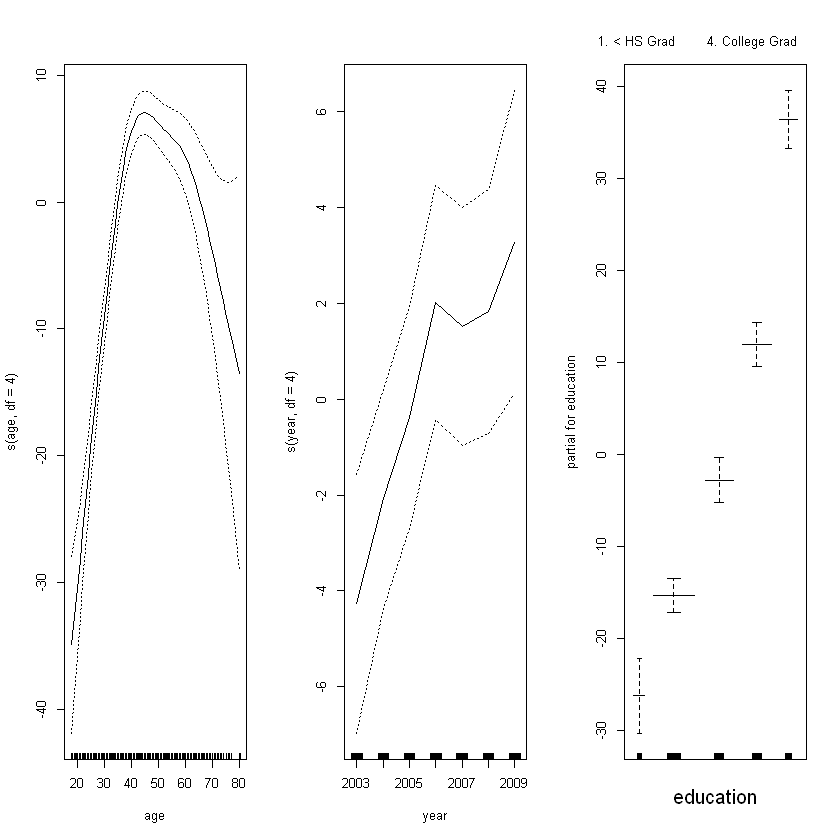

In [13]:
# response is wage
# s means we want a smooth term in age with 4 degrees of freedom.
# a smooth term in year with 4 degrees of freedom
# education is a factor variable, so keep it as a linear term (it'll make dummy
# variables for each of the levels and fit constants)
# s is a special function to gam that tells it it wants a smoothing spline in
# the variable age with four degrees of freedom.
gam1 <- gam(wage ~ s(age, df = 4) + s(year, df = 4) + education, data = Wage)
# set up a plotting grid where we want 3 columns
par(mfrow = c(1, 3))
# Produces a plot for each of the terms in the gam
plot(gam1, se = T)


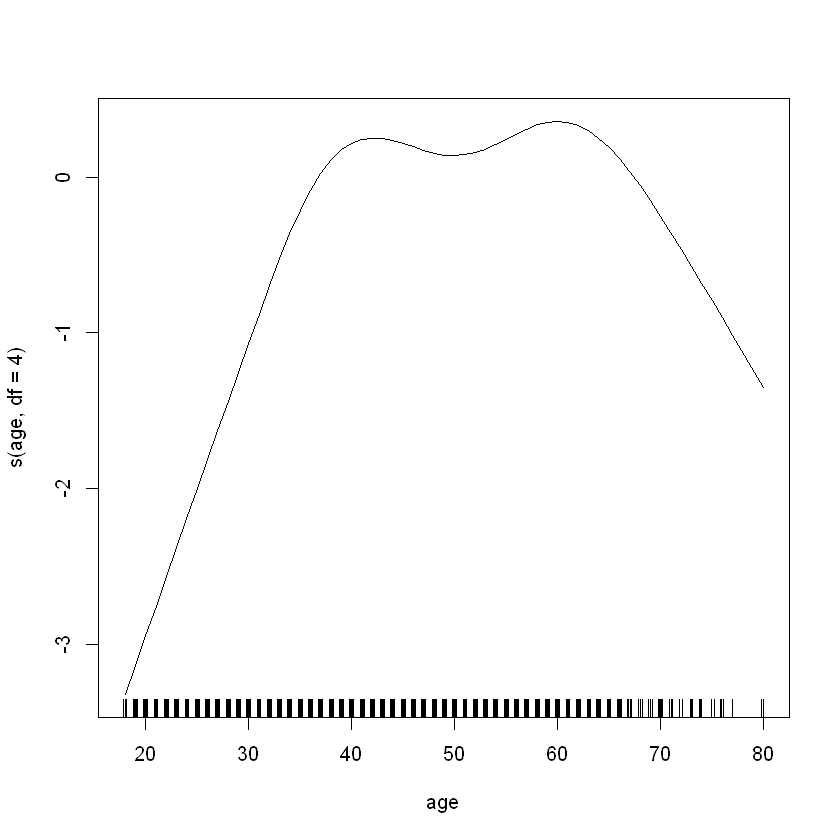

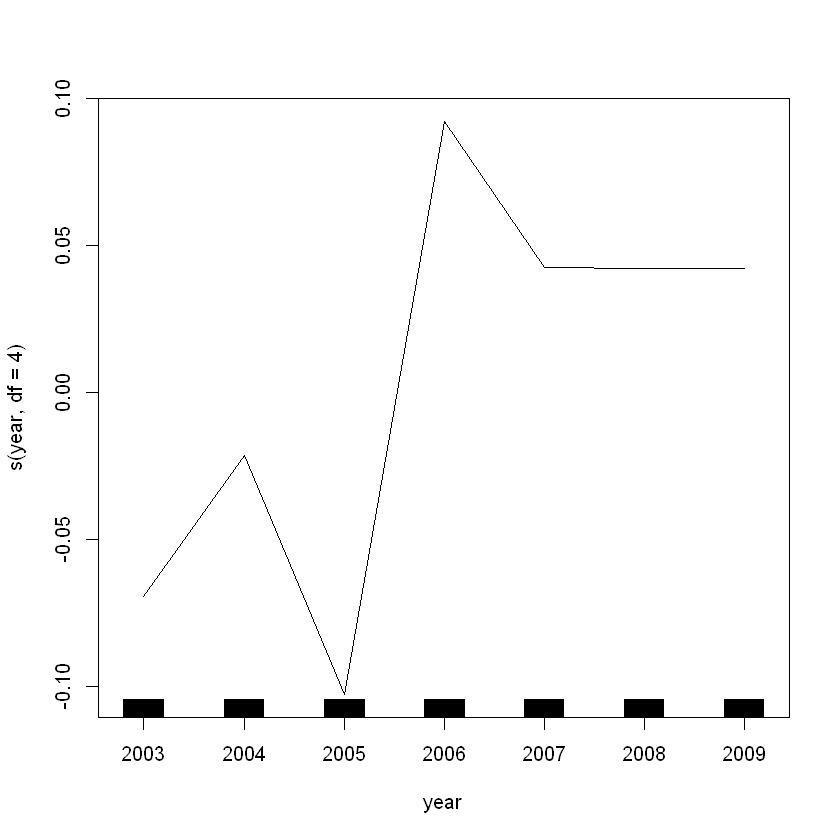

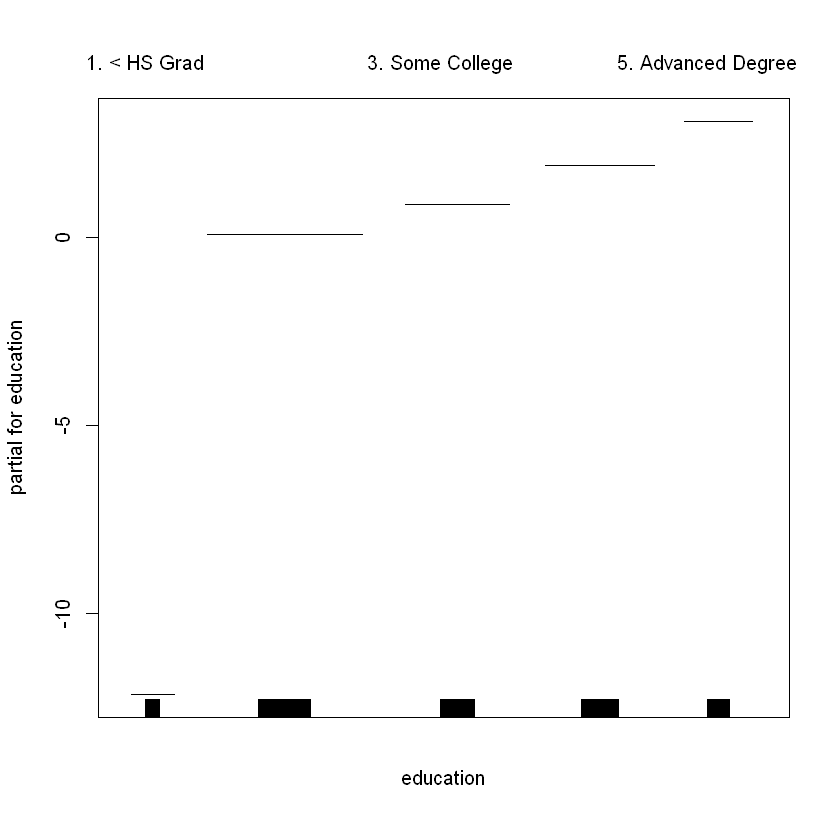

In [16]:
# gam with generalized linear models.
gam2 <- gam(I(wage > 250) ~ s(age, df = 4) + s(year, df = 4) + education, data = Wage, family = binomial)
# And so this is plotting the contributions to the logit of the probability,
# each as the separate functions.
plot(gam2)


In [17]:
gam2a <- gam(I(wage > 250) ~ s(age, df = 4) + year + education, data = Wage, family = binomial)
# Use anova to test those two models
# The chi-square, the p value is 0.82, which says we really don't need
# this non-linear term for year. A linear term will be fine.
anova(gam2a, gam2, test = "Chisq")


,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2990,603.7774,NA,NA,NA
2,2987,602.8725,2.999983,0.9049826,0.8242229


It turns out you can use the plot method from gam to plot
models even fit by lm and glm.

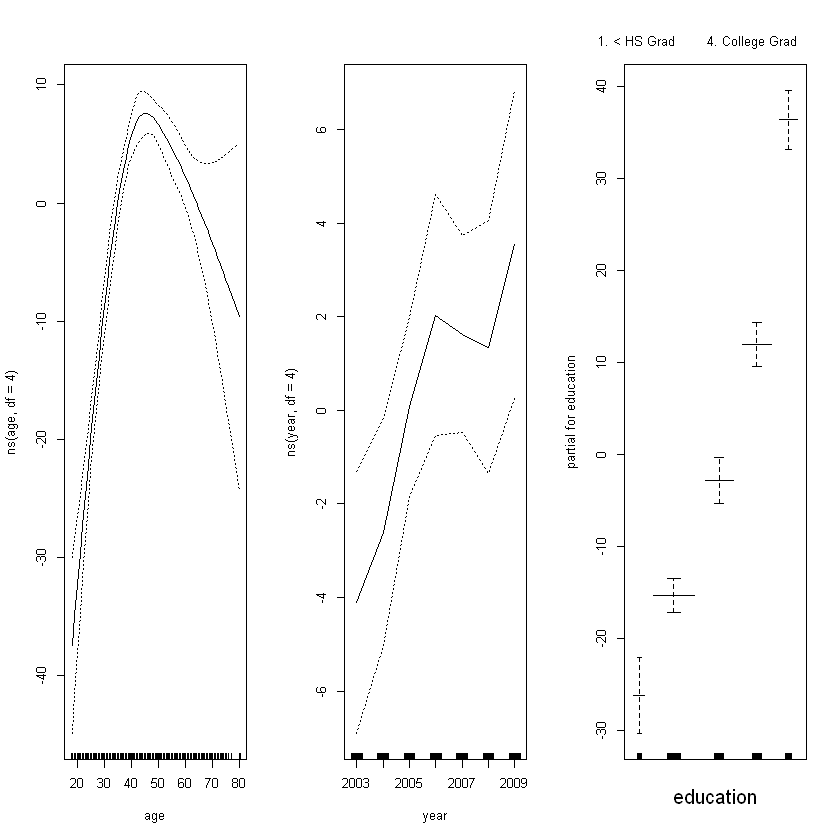

In [19]:
par(mfrow = c(1, 3))
# Fir a linear model with wage as the response, but instead using lm.
# ns is natural spline in age.
lm1 <- lm(wage ~ ns(age, df = 4) + ns(year, df = 4) + education, data = Wage)
# since l,m is not of class gam we need to write out plot.gam
plot.Gam(lm1, se = T)
